# Week 4 Lab (Linear Regression)
COSC 3337 Dr. Rizk

## About The Data
Our goal for this lab is construct a model that can take a certain set of housing features and give us back a price estimate. Since price is a continuous variable, linear regression may be a good place to start from.
The dataset that we'll be using for this task comes from kaggle.com and contains the following attributes:
* 'Avg. Area Income': Avg. income of residents of the city house is located in.
* 'Avg. Area House Age': Avg age of houses in same city
* 'Avg. Area Number of Rooms': Avg number of rooms for houses in same city
* 'Avg. Area Number of Bedrooms': Avg number of bedrooms for houses in same city
* 'Area Population': Population of city house is located in
* 'Price': Price that the house sold at (target)
* 'Address': Address for the house

## Exploratory Data Analysis
Let's begin by importing some necessary libraries that we'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5 # dimenstion 15x5 
sns.set_style('darkgrid')

Our first step is to load the data into a pandas DataFrame

In [3]:
housing_data = pd.read_csv('USA_Housing.csv')
housing_data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# housing_data = pd.read_csv('USA_Housing.csv')
housing_data.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
housing_data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [7]:
housing_data['Price'].describe()

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

In [8]:
housing_data['Price'].unique()

array([1059033.55787012, 1505890.91484695, 1058987.98787608, ...,
       1030729.58315229, 1198656.87240769, 1298950.48026696])

In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [9]:
housing_data.shape

(5000, 7)

A quick pairplot lets us get an idea of the distributions and relationships in our dataset. From here, we could choose any interesting features that we'd like to later explore in greater depth. Warning: The more features in our dataset, the harder our pairplot will be to interpret.

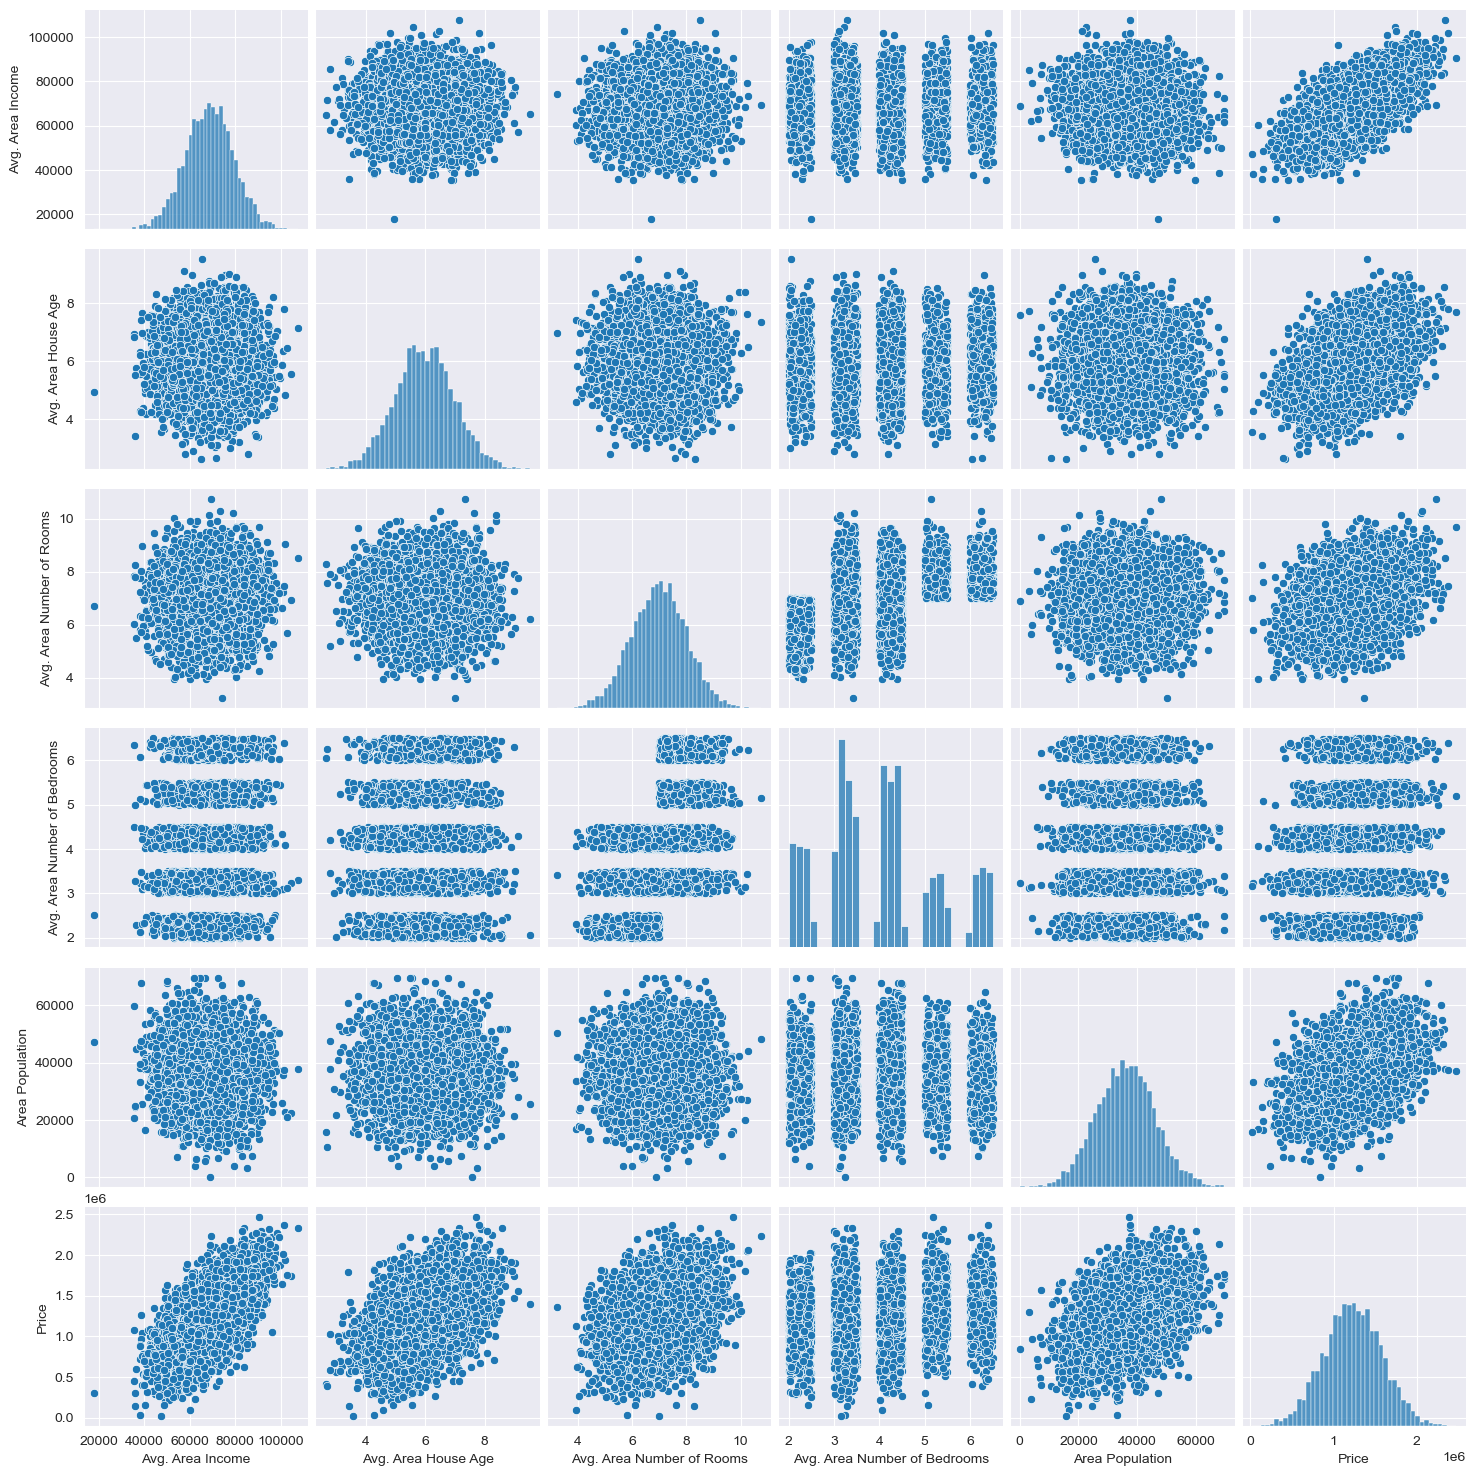

In [10]:
sns.pairplot(housing_data)
plt.show()

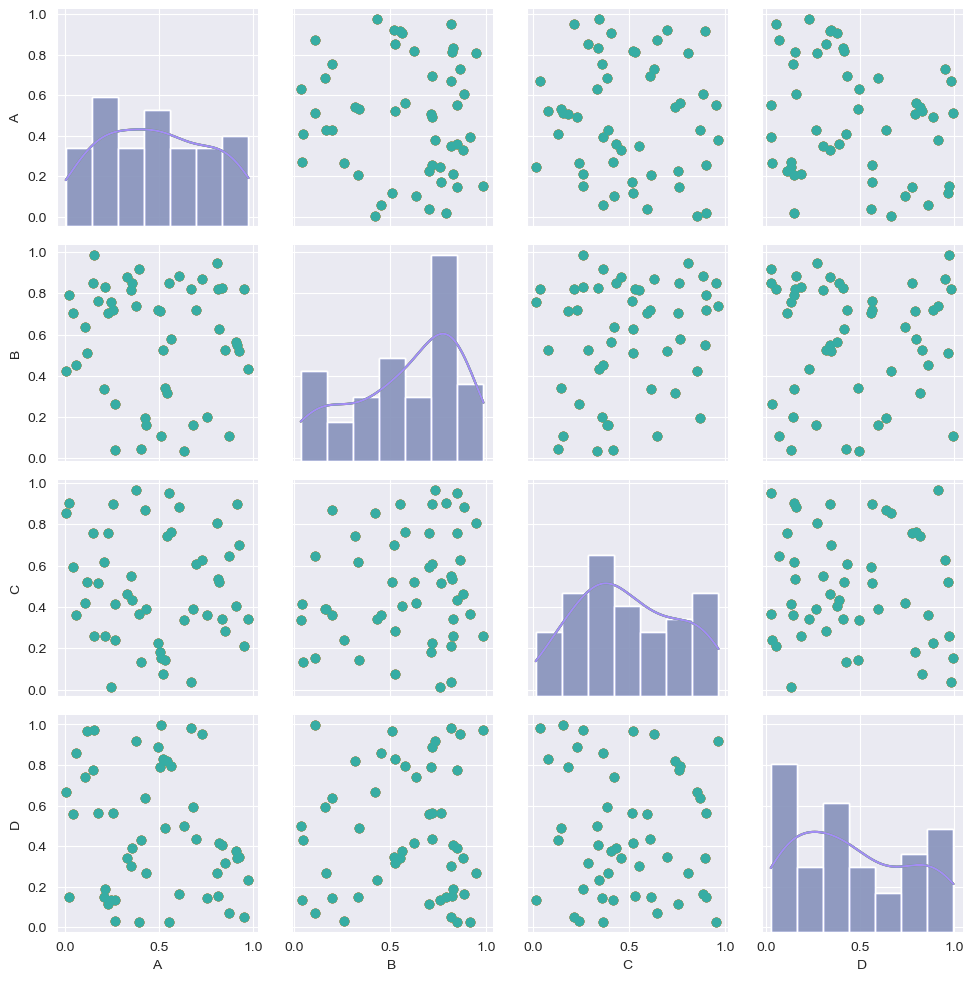

In [14]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np

# Example DataFrame
housing_data = pd.DataFrame({
    'A': np.random.rand(50),
    'B': np.random.rand(50),
    'C': np.random.rand(50),
    'D': np.random.rand(50)
})

# Custom pairplot function to assign unique colors
def pairplot_custom(data, **kwargs):
    grid = sns.PairGrid(data, **kwargs)
    colors = sns.color_palette("husl", len(data.columns))
    for i, color in enumerate(colors):
        grid.map_diag(sns.histplot, color=color, kde=True)
        for j in range(i+1, len(colors)):
            grid.map_offdiag(plt.scatter, color=color)
    return grid

pairplot_custom(housing_data)
plt.show()


Taking a closer look at price, we see that it's normally distributed with a peak around 1.232073e+06, and 75% of houses sold were at a price of 1.471210e+06 or lower.

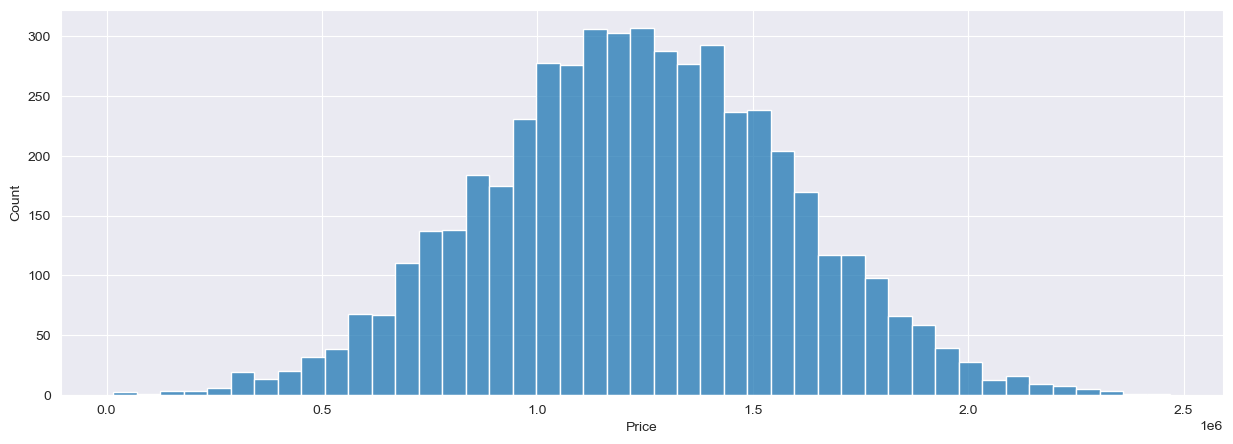

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64


In [7]:
sns.histplot(housing_data['Price'])
plt.show()
print(housing_data['Price'].describe())

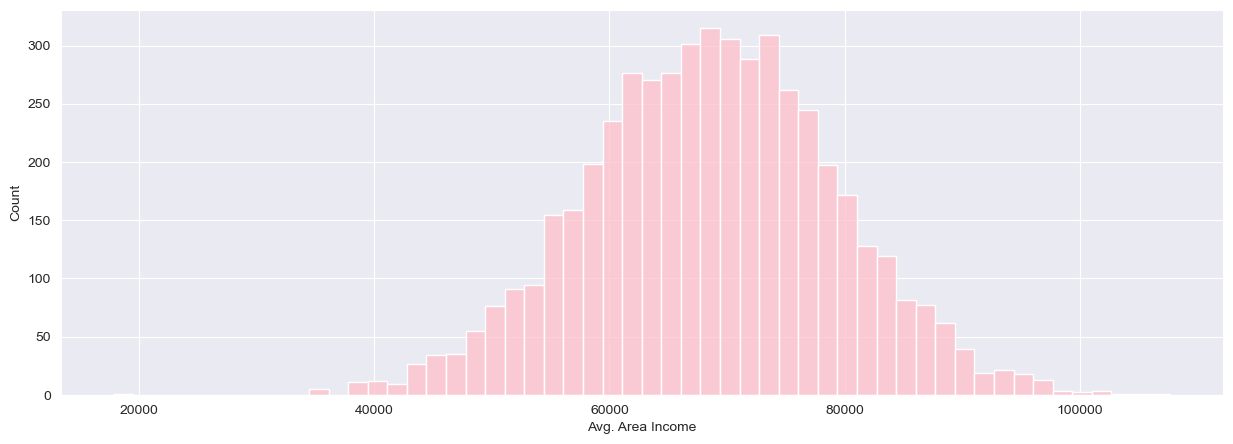

count      5000.000000
mean      68583.108984
std       10657.991214
min       17796.631190
25%       61480.562388
50%       68804.286404
75%       75783.338666
max      107701.748378
Name: Avg. Area Income, dtype: float64


In [23]:
sns.histplot(housing_data['Avg. Area Income'], color = "pink")
plt.show()
print(housing_data['Avg. Area Income'].describe())

A scatterplot of Price vs. Avg. Area Income shows a strong positive linear relationship between the
two.

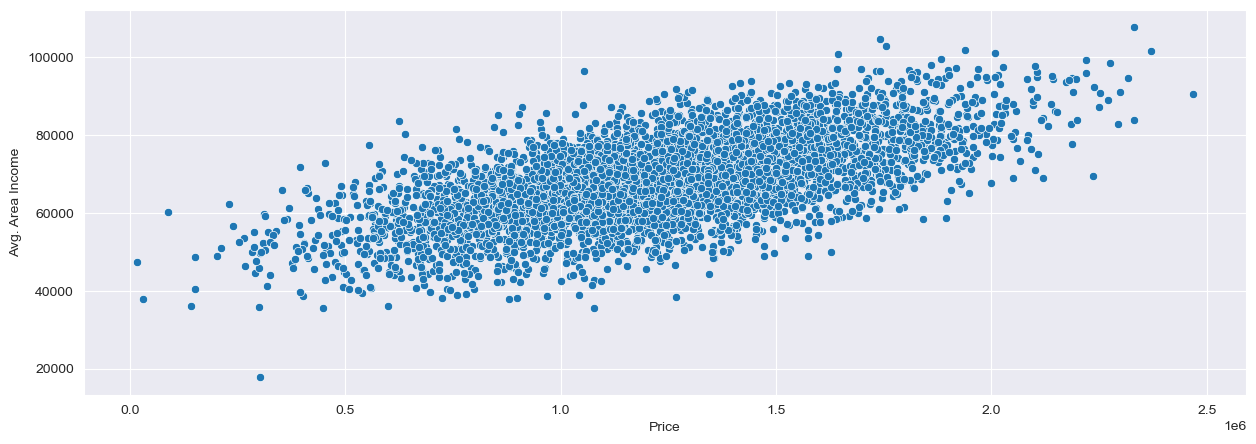

In [9]:
sns.scatterplot(x='Price', y='Avg. Area Income', data=housing_data)
plt.show()

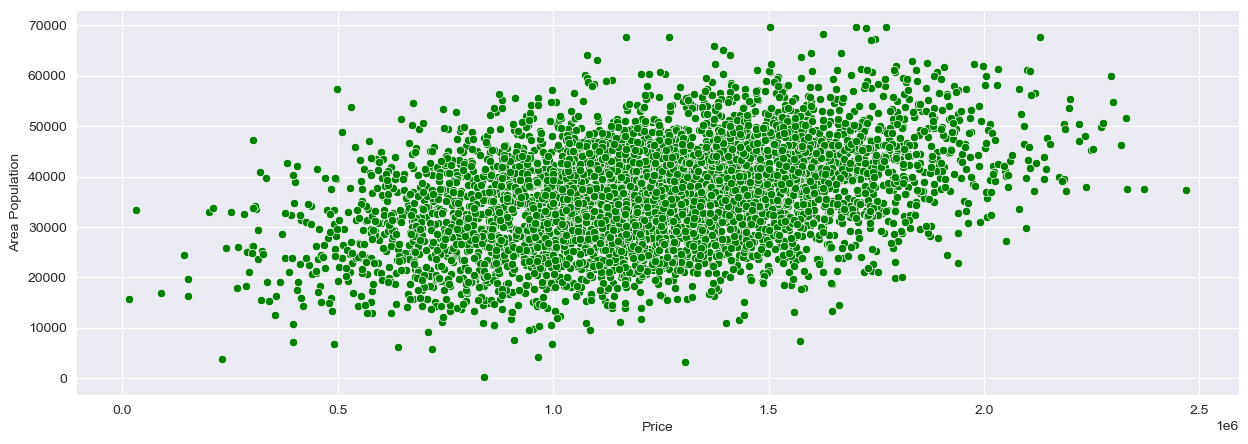

In [24]:
sns.scatterplot(x='Price', y='Area Population', data=housing_data, color = 'green')
plt.show()

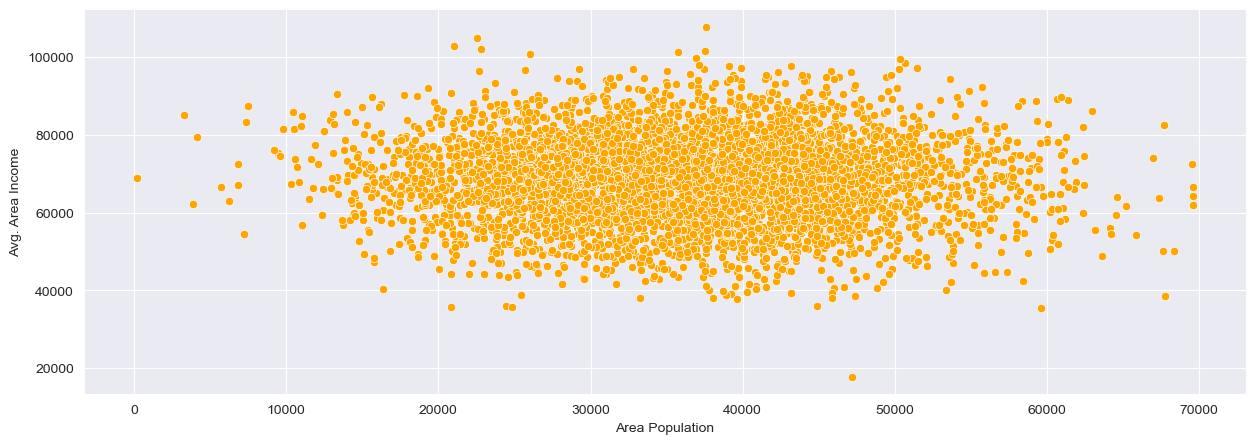

In [28]:
sns.scatterplot(x='Area Population', y='Avg. Area Income', color = 'orange', data=housing_data)
plt.show()

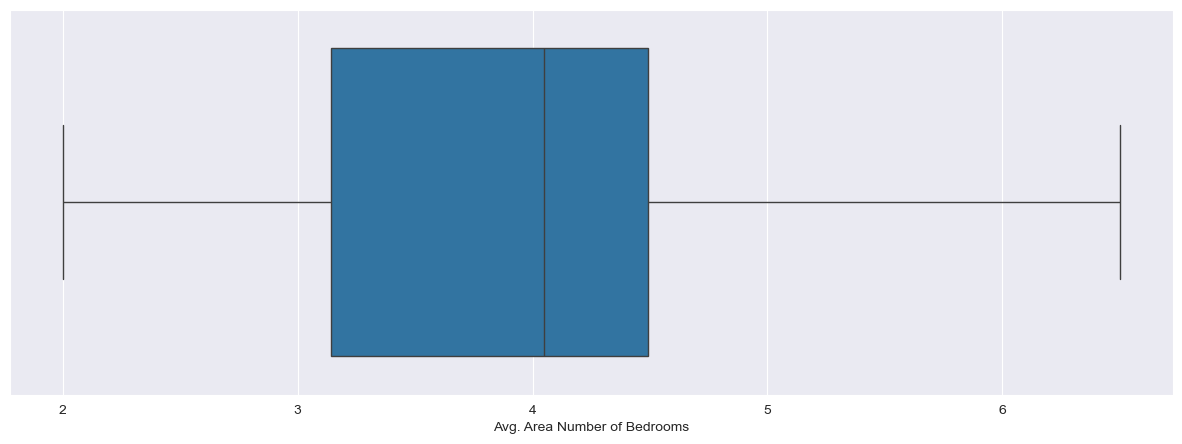

In [27]:
sns.boxplot(x='Avg. Area Number of Bedrooms', data=housing_data)
plt.show()

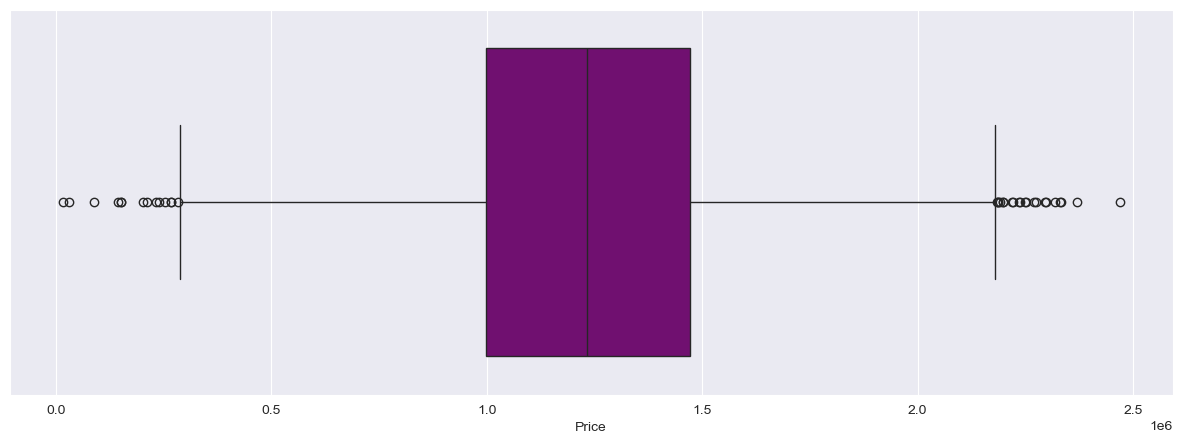

In [29]:
sns.boxplot(x='Price', data=housing_data, color = 'purple')
plt.show()

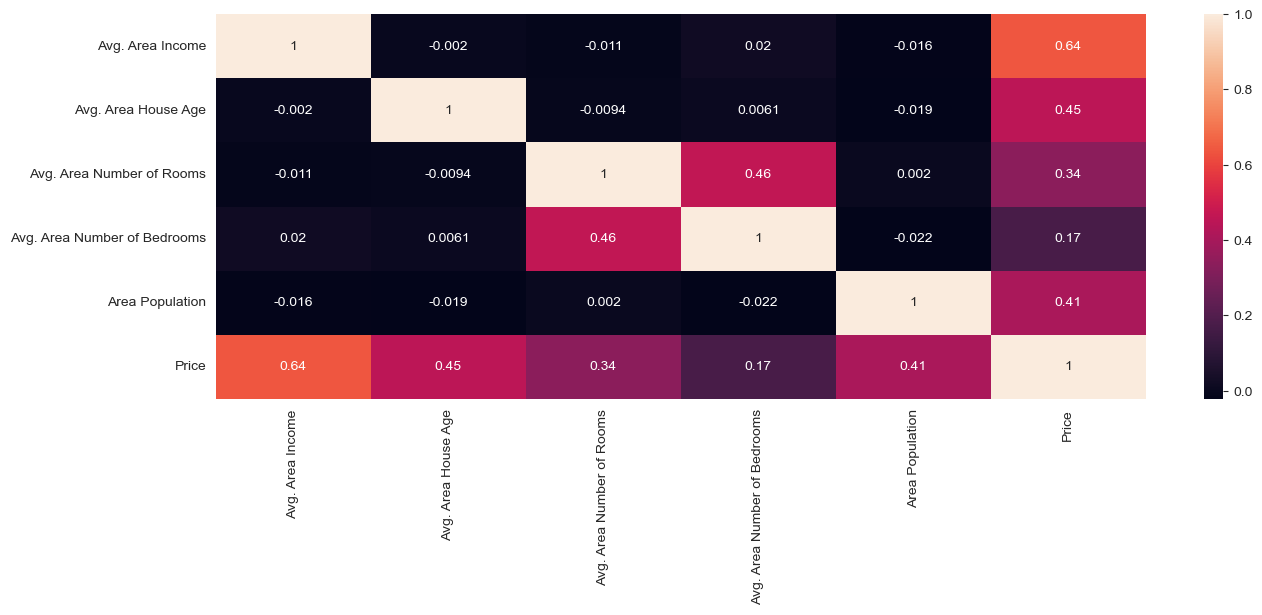

In [11]:
# Select only the numeric columns
numeric_data = housing_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

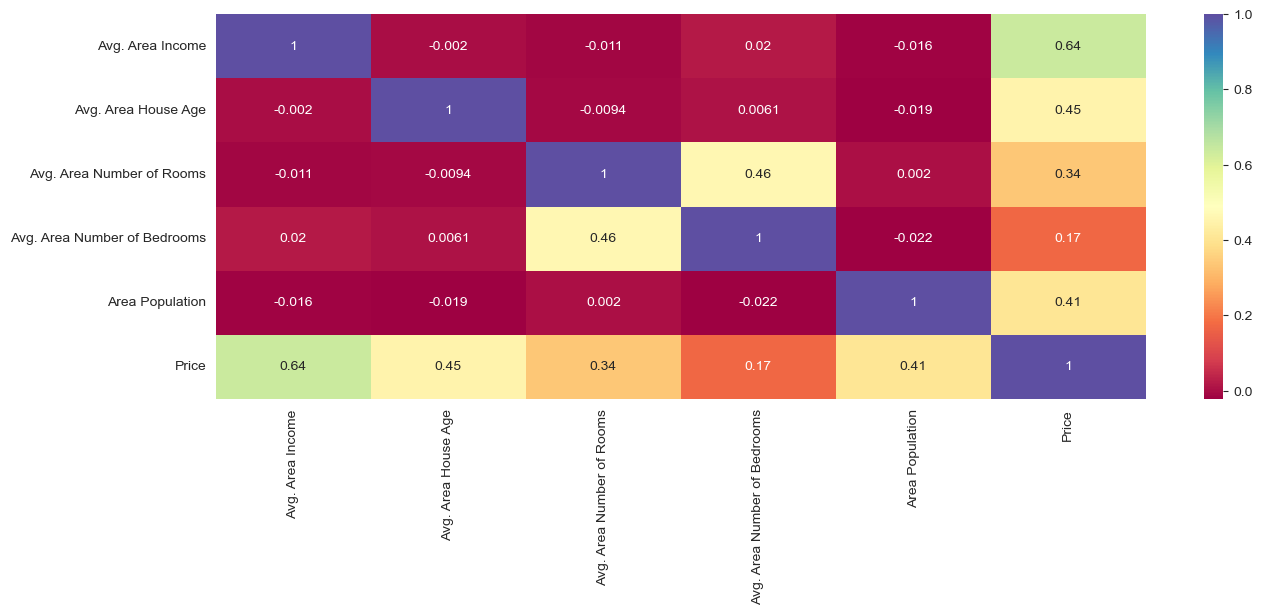

In [30]:
# Select only the numeric columns
numeric_data = housing_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap = 'Spectral')
plt.show()

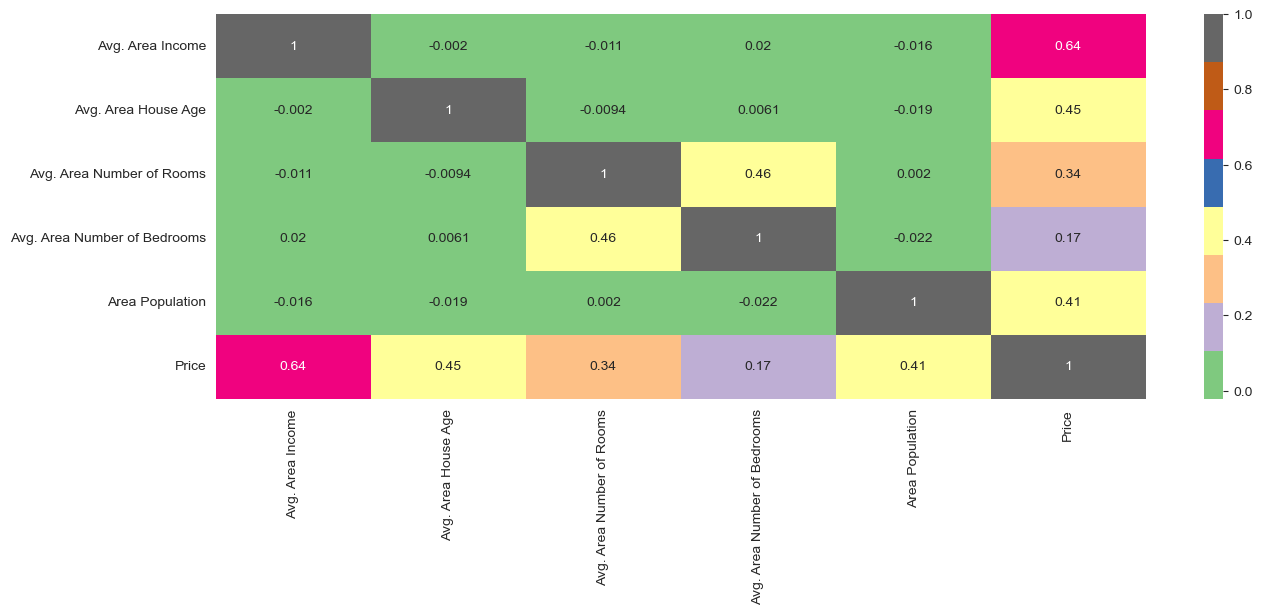

In [31]:
# Select only the numeric columns
numeric_data = housing_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap = 'Accent')
plt.show()

## Creating Our Linear Model
We're now ready to begin creating and training our model. We first need to split our data into training and testing sets. This can be done using sklearn's train_test_split(X, y, test_size) function. This function takes in your features (X), the target variable (y), and the test_size you'd like (Generally a test size of around 0.3 is good enough). It will then return a tuple of X_train, X_test, y_train, y_test sets for us. We will train our model on the training set and then use the test set to evaluate the model.

In [38]:
from sklearn.model_selection import train_test_split

X = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing_data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
from sklearn.model_selection import train_test_split

X2 = housing_data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Price']]
y2 = housing_data['Area Population']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

We'll now import sklearn's LinearRegression model and begin training it using the fit(train_data,
train_data_labels) method. In a nutshell, fitting is equal to training. Then, after it is trained, the model
can be used to make predictions, usually with a predict(test_data) method call. You can think of fit as
the step that finds the coefficients for the equation.

In [49]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [48]:
# from sklearn.linear_model import LinearRegression

# lm = LinearRegression()
# lm.fit(X_train2,y_train2)

LinearRegression()

### Model Evaluation
Now that we've finished training, we can make predictions off of the test data and evaluate our
model's performance using the corresponding test data labels (y_test).
To get a rough idea of how well the model is predicting, we can make a scatterplot with the true test
labels (y_test) on the x‑axis, and our predictions on the y‑axis. Ideally, we'd like a 45 degree line. The
straighter the line, the better our predictions are.

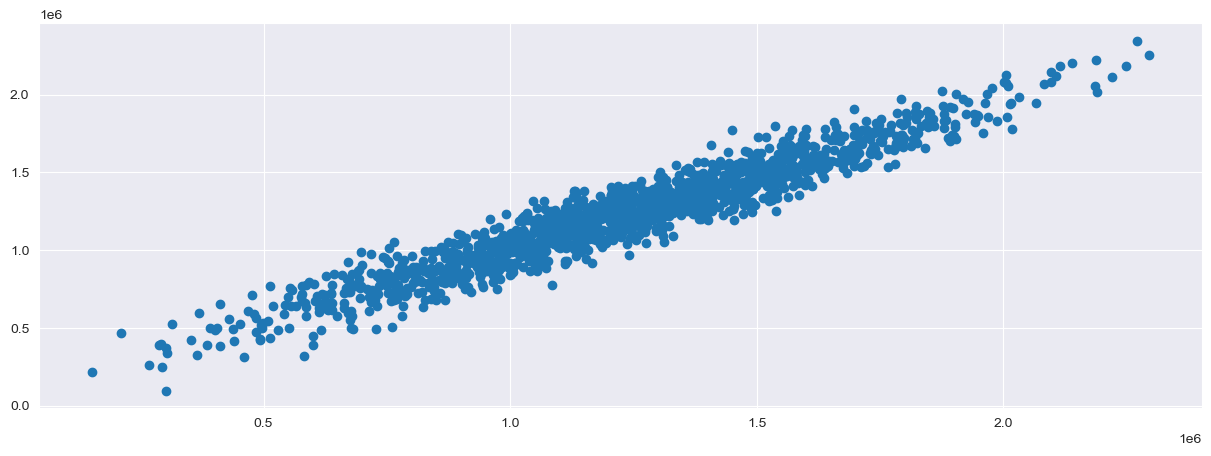

In [50]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.show()

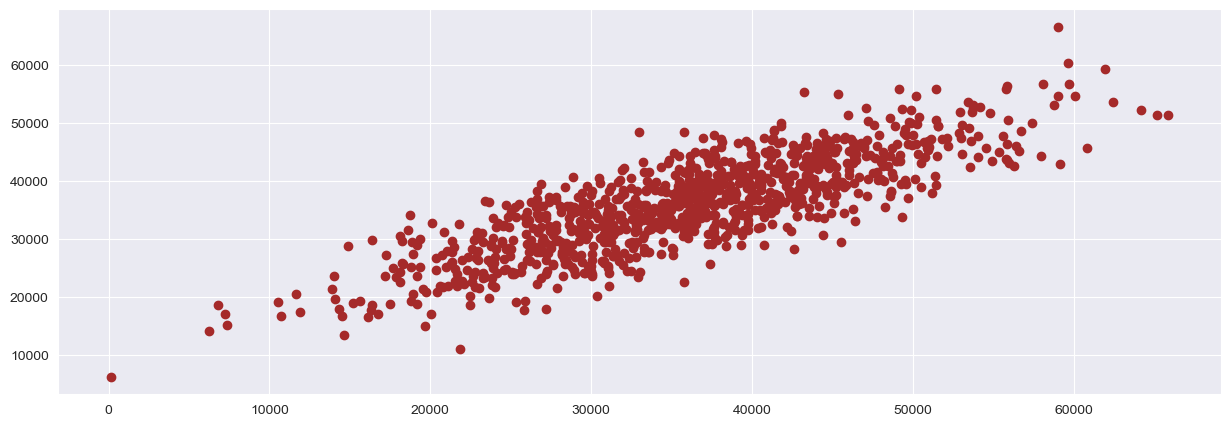

In [43]:
# predictions2 = lm.predict(X_test2)
# plt.scatter(y_test2,predictions2, color = 'brown')
# plt.show()

Something that you may recall from MATH 3339 is that we'd like to see the residuals be normally
distributed in regression analysis. We can exam this as follows:

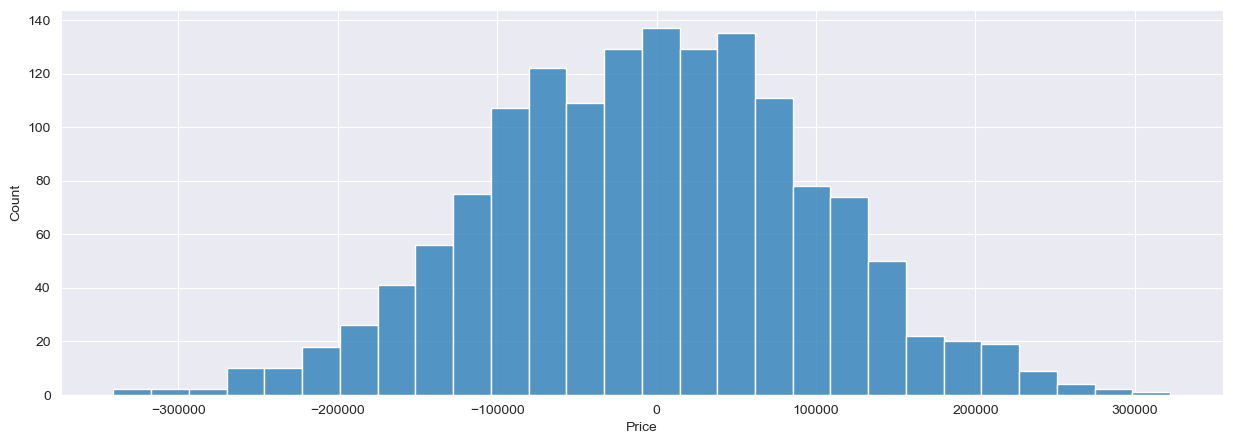

In [15]:
residuals = y_test - predictions
sns.histplot(residuals)
plt.show()

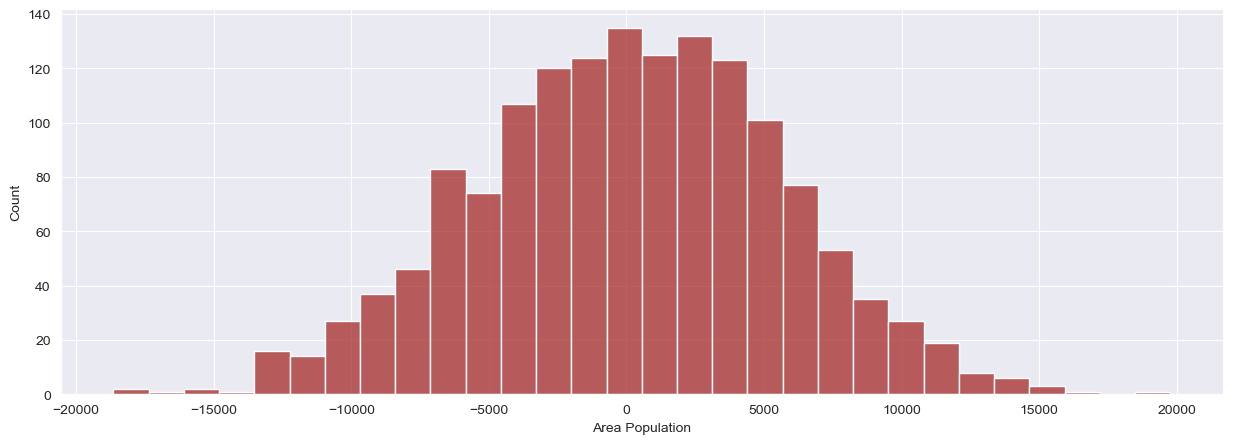

In [66]:
# residuals2 = y_test2 - predictions2
# sns.histplot(residuals2, color = 'brown')
# plt.show()

Here are the most common evaluation metrics for regression problems:
* **Mean Absolute Error (MAE)** is the mean of the absolute value of the errors:
* **Mean Squared Error (MSE)** is the mean of the squared errors:
* **Root Mean Squared Error (RMSE)** is the square root of the mean of the squared errors:

Comparing these metrics:
* MAE is the easiest to understand, because it's the average error.
* MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
* RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

Luckily, sklearn can calculate all of these metrics for us. All we need to do is pass the true labels (y_test) and our predictions to the functions below. What's more important is that we understand what each of these means. Root Mean Square Error (RMSE) is what we'll most commonly use, which is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data is around the line of best fit. Determining a good RMSE depends on your data. You can find a great example here, or refer back to the power points.

In [16]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81555.8363436909
MSE: 10375478411.94147
RMSE: 101860.09234210162


In [67]:
# from sklearn import metrics

# print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
# print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

MAE: 4455.351257281099
MSE: 30824610.965806127
RMSE: 5551.991621554028


In [51]:
from sklearn.metrics import r2_score

print('R2 Score:', r2_score(y_test, predictions))

R2 Score: 0.917135883864957


In [68]:
# from sklearn.metrics import r2_score

# print('R2 Score:', r2_score(y_test2, predictions2))

R2 Score: 0.6984411647939031


Finally, let's see how we can interpret our model's coefficients. We can access the coefficients by
calling coef_ on our linear model (lm in this case). We'll use this and put it in a nice pandas DataFrame
for visual purposes. Note: You can also call intercept_ if you'd like to get the intercept

In [52]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.618143
Avg. Area House Age,165352.193645
Avg. Area Number of Rooms,120404.487776
Avg. Area Number of Bedrooms,2437.788783
Area Population,15.471563


* Holding all other features fixed, a 1 unit increase in Avg. Area Income is associated with an increase of $21.564645.

<br>

* Holding all other features fixed, a 1 unit increase in Avg. Area House Age is associated with an increase of $166102.423648 .

<br>

* Holding all other features fixed, a 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122398.915857 .

<br>

* Holding all other features fixed, a 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $887.665746 .

<br>

* Holding all other features fixed, a 1 unit increase in Area Population is associated with an
increase of $15.309706 .